<a href="https://colab.research.google.com/github/elliotgunn/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt

from matplotlib.patches import Circle

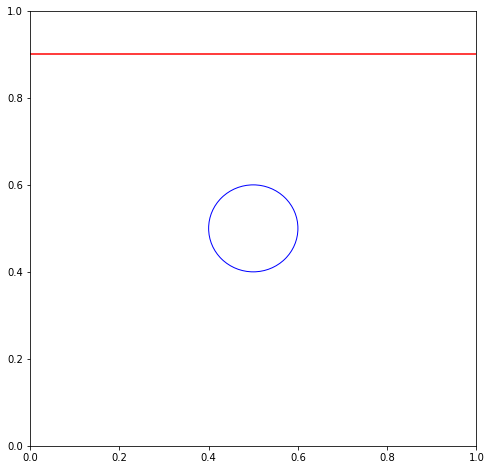

In [0]:
#Create figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

# circle
circle = Circle((0.5, 0.5), 0.1, fill=False, color='b')

# Draw the circles to our plot
ax.add_artist(circle)

# line
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()


plt.show();

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because a function can only have one output, y, for each unique input, x

No two inputs have the same output 

Each input is mapped to no more than one output

shortcut: repeated x values are a red flag

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

only relation 2 

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

In [0]:
# dimension of input: 3
# output: 3

# input: 4
# output: 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

In [0]:
# no

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [0]:
# unit vectors

px1 = [1, 3]
px2 = [-1, 2]

# transformation matrix

T = np.array([[1, 3],
               [-1,2]])



In [0]:
# unit vectors

px1 = [4, 1, 2]
px2 = [4, 1, 2]
px3 = [5, 1,-2]

# transformation matrix

T2 = np.array([[4, 1, 2],
               [4, 1, 2],
               [5, 1,-2]])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
# verify by multiplying transformation matrix by a random input
# x=3, y=4
# this should yield 
# np.array([3+3(4)],
          #[2(4)-3] = [15, 5] 
 
test = [3, 4]

new = np.matmul(T, test)
new


array([15,  5])

In [0]:
# x = 1, y =2, z = 3
# this should yield
# [12, 12, 1]

test = [1,2,3]

new = np.matmul(T2, test)
new

array([12, 12,  1])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

They always come in pairs. 

So a linear transformation is when you stretch/squeeze the dimensional space in any one direction. 

When you stretch/squeeze the dimensional space, the original vector may change in magnitude and direction.

But some vectors don't change their direction!

If the direction doesn't change, the new vector is an eigenvector, and the scalar by which the vector is transformed to get the new vector is called the eigenvalue.

The eigenvalue is the value by which you squish the eigenvector.

Example:

We have a vector a = 0i + 1j and decide to stretch it vertically at twice the size
a' = 0i + 2j
Notice that the direction of a has not changed. So this is an eigenvector. 
The scalar by which a is multiplied to obtain a' is called the eigenvalue (2)


Other definitions:
An eigenvalue is how much the eigenvalue gets squished during a transformation. Hence it is the scalar that shows how the eigenvector was scaled during transformation.


# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

-There is a lot of noise, redundancy
-It's hard to visualize and explore it 
-models with high feature to observation ratio are proe to overfitting
-diminishing returns with additional features: the likelihood of adding a feature that contributes meaningful signal decreasing with each additional dimension
-it gets expensive due to increased computational workload
-increased sparcity of data (more dimensions, more spread out)


## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

N = 5P

# Principal Component Analysis

[Best explanation of PCA](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'

import pandas as pd

df = pd.read_csv(url)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## numpy version

In [0]:
from numpy import array
from numpy import mean, std
from numpy import cov
from numpy.linalg import eig


features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# separating out the features
# loc[rows, columns]
# .values returns an array
x = df.loc[:, features].values

# print("Data: ", x)

# separating out the target
y = df.loc[:, 'species'].values


# calculate the mean of each column
# have to transpose the x columns
means = mean(x.T, axis=1)
print("\n Means: \n", means)

# center columns by subtracting column means
centered_data = x - means
# print("\n Centered Data: \n", centered_data)

# calculate standard deviation
stddevs = std(x.T, axis=1)
# print("\n Standardized Data: \n", standardized_data)

# standardize columns by subtracting means and divide by stddevs
standardized_data = (x - mean(x)) / std(x)

# calculate covariance matrix of standardized data
covariance_matrix = cov(standardized_data.T)
# print("\n Covariance Matrix: \n", covariance_matrix)

# eigendecomposition of covariance matrix
values, vectors = eig(covariance_matrix)

print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)

# project data
P = vectors.T.dot(standardized_data.T)
print("\n Projected Data: \n", P.T)


## scikitlearn version

In [0]:
from numpy import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# separating out the features
# loc[rows, columns]
# .values returns an array
x = df.loc[:, features].values

# print("Data: ", x)

# separating out the target
y = df.loc[:, 'species'].values

# standardize features
x = StandardScaler().fit_transform(x)

# create the PCA instance, 2 refers to the top two features we want
pca = PCA(2)

# fit on data
pca.fit(x)

# access values and vectors using library
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

# transform data
B = pca.transform(x)
print("\n Projected Data: \n", B)



 Eigenvectors: 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

 Eigenvalues: 
 [2.93035378 0.92740362]

 Projected Data: 
 [[-2.26454173e+00  5.05703903e-01]
 [-2.08642550e+00 -6.55404729e-01]
 [-2.36795045e+00 -3.18477311e-01]
 [-2.30419716e+00 -5.75367713e-01]
 [-2.38877749e+00  6.74767397e-01]
 [-2.07053681e+00  1.51854856e+00]
 [-2.44571134e+00  7.45626750e-02]
 [-2.23384186e+00  2.47613932e-01]
 [-2.34195768e+00 -1.09514636e+00]
 [-2.18867576e+00 -4.48629048e-01]
 [-2.16348656e+00  1.07059558e+00]
 [-2.32737775e+00  1.58587455e-01]
 [-2.22408272e+00 -7.09118158e-01]
 [-2.63971626e+00 -9.38281982e-01]
 [-2.19229151e+00  1.88997851e+00]
 [-2.25146521e+00  2.72237108e+00]
 [-2.20275048e+00  1.51375028e+00]
 [-2.19017916e+00  5.14304308e-01]
 [-1.89407429e+00  1.43111071e+00]
 [-2.33994907e+00  1.15803343e+00]
 [-1.91455639e+00  4.30465163e-01]
 [-2.20464540e+00  9.52457317e-01]
 [-2.77416979e+00  4.89517027e-01]
 [-1.82041156

In [0]:
# setting up the dataframe for plotting

new_df = pd.DataFrame(data=B, columns=['PC1', 'PC2'])

new_df.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [0]:
# adding the "target" or projected axis

final_df = pd.concat([new_df, df[['species']]], axis = 1)

final_df.head()

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


In [0]:
final_df['species'].describe()

count            150
unique             3
top       versicolor
freq              50
Name: species, dtype: object

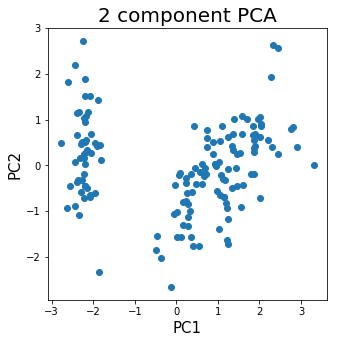

In [0]:
# plot

import matplotlib.pyplot as plot

fig = plt.figure(figsize = (5,5))

# addsubplot(): pos is a three digit integer, where the first digit is the number of rows, the second the number of columns, and the third the index of the subplot
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 component PCA', fontsize = 20)

plt.scatter('PC1', 'PC2', data=final_df)

plt.show()


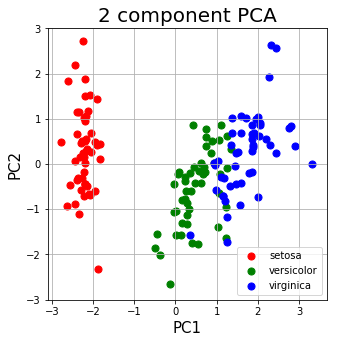

In [0]:
# solution found online 

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['species'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1']
               , final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)